Total length of wire (mm): 8395.314358052845


length of the inncoil wire is : 8395.314358052845
Total length of wire (mm): 13132.173029960473


length of the upp_outcoil wire is : 13132.173029960473
Total length of wire (mm): 13132.173029960473


length of the low_inncoil wire is : 13132.173029960473
-2.0
Upper OuterCoil: I= 0.000, V = 0.000080+0.230068j 
Lower OuterCoil: I= 0.000, V = 0.000176+0.326709j 
InnerCoil: I= 0.020, V = 0.09169940+0.57602939j 
-1.8
Upper OuterCoil: I= 0.000, V = 0.000084+0.235191j 
Lower OuterCoil: I= 0.000, V = 0.000172+0.322837j 
InnerCoil: I= 0.020, V = 0.09169940+0.57600491j 
[-2.  -1.8]
[7.97800467e-05+0.23006814j 8.41714525e-05+0.23519072j]
[0.00017617+0.32670854j 0.00017194+0.32283664j]
[0.0916994+0.57602939j 0.0916994+0.57600491j]


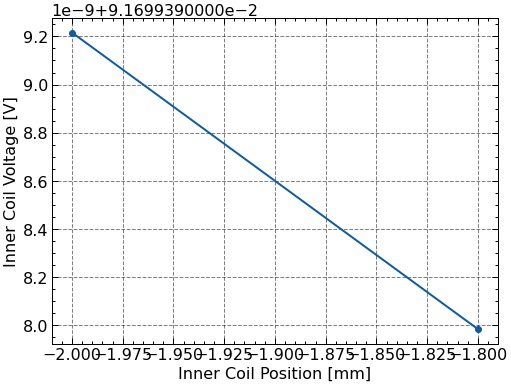

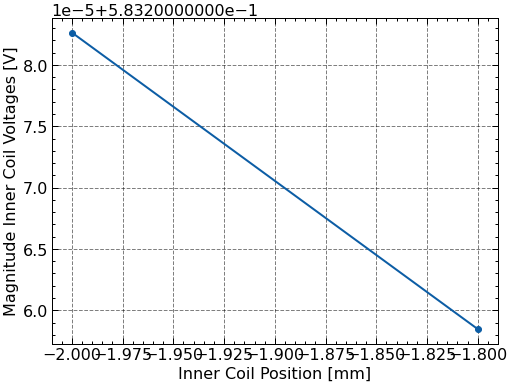

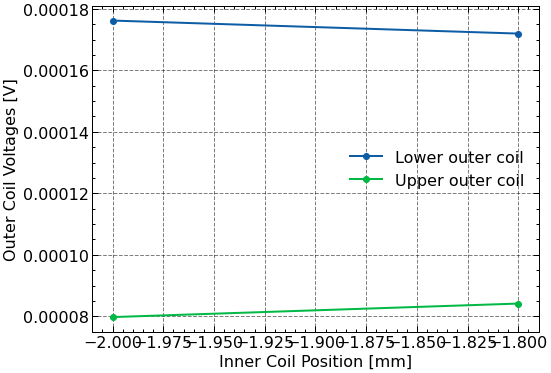

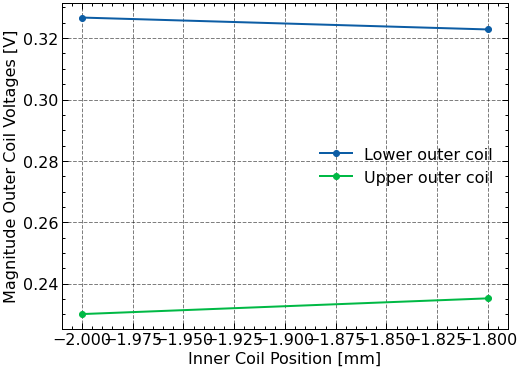

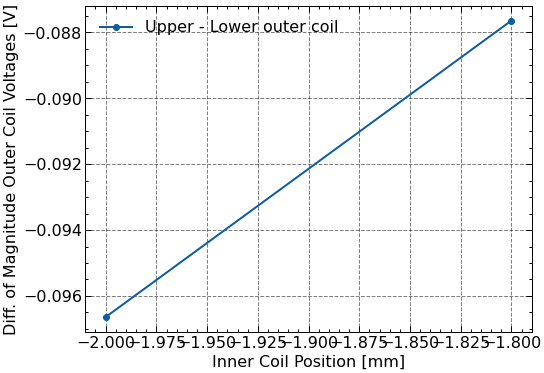

[1.41292878 1.41292218]
[1.5702571  1.57026375]
[1.57044956 1.57043844]
Phase offset: -0.1573283245998658 -0.15751625911025302


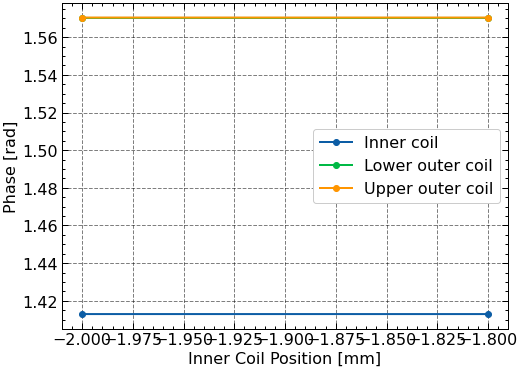

Fitted slope of the function: 11.243107168572315
[11.24310717 -1.67389501]


C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: `ydata` must not be empty!

In [1]:
import design
import femm
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt
import os
import shutil

class Analysis():
    def __init__(self, parameter, filename: str):
        self.parameter = parameter
        self.filename = filename
    def simulation(self):
        femm.openfemm()
        femm.newdocument(0)

        outputfile = 'MirrorTowerInterfilter_10kHz_20mA_32AWG_10mm_6_5_5.out'
        NSteps = 1
        StepSize = 0.2
        InnCoil_Offset = -2

        sensor = design.Sensortype(0.02, 10000, 0)
        femm.mi_probdef(sensor.para()[1], 'millimeters', 'axi', 1.0e-10)
        wire = design.Wiretype("32 AWG", "32 AWG")
        geo = design.Geometry(inn_ht = 7, inn_rad = 7, inn_layers = 6, inn_dist = 0, out_ht = 8, out_rad = 12, out_layers = 5, out_dist = 10, mag_len = 40, mag_dia = 10, ver_shi = 0)

        data_file = self.filename
        directory = data_file
        parent_dir = "C:\\Users\\kumar\\OneDrive\\Desktop\\pi\\bench"
        path = os.path.join(parent_dir, directory)
        os.mkdir(path)
        save_plot = path
        multiple_fit = 1

        #directory = "dist = 9 "
        #parent_dir = "C:\\Users\\kumar\\OneDrive\\Desktop\\pi\mirror\\res"
        #path = os.path.join(parent_dir, directory)
        #os.mkdir(path)
        #save_plot = path


        class Position():
            def __init__(self):
                pass

            def inncoil(self):
                InnCoil_OutRadius = geo.inncoil()[1] + ((wire.prop32()[0] + wire.prop32()[1] * 2) * geo.inncoil()[2])
                InnCoil_Lowend = (geo.inncoil()[3] - geo.inncoil()[0]) / 2
                InnCoil_Uppend = InnCoil_Lowend + geo.inncoil()[0]
                InnCoil_NrWind_p_Layer = (geo.inncoil()[0]) / (wire.prop32()[0] + wire.prop32()[1] * 2)
                InnCoil_NrWindings = InnCoil_NrWind_p_Layer * geo.inncoil()[2]
                InnCoil_Circuit = "InnCoil_Circuit"
                return [InnCoil_OutRadius, InnCoil_Lowend, InnCoil_Uppend, InnCoil_NrWind_p_Layer, InnCoil_NrWindings,
                        InnCoil_Circuit]

            def upp_outcoil(self):
                UppOutCoil_OutRadius = geo.outcoil()[1] + ((wire.prop32()[0] + wire.prop32()[1] * 2) * geo.outcoil()[2])
                UppOutCoil_LowEnd = (geo.outcoil()[3] - geo.outcoil()[0]) / 2
                UppOutCoil_UppEnd = UppOutCoil_LowEnd + geo.outcoil()[0]
                UppOutCoil_NrWind_p_Layer = (geo.outcoil()[0]) / (wire.prop32()[0] + wire.prop32()[1] * 2)
                UppOutCoil_NrWindings = UppOutCoil_NrWind_p_Layer * geo.outcoil()[2]
                UppOutCoil_Circuit = "UppOutCoil_Circuit"
                return [UppOutCoil_OutRadius, UppOutCoil_LowEnd, UppOutCoil_UppEnd, UppOutCoil_NrWind_p_Layer,
                        UppOutCoil_NrWindings, UppOutCoil_Circuit]

            def low_outcoil(self):
                LowOutCoil_OutRadius = geo.outcoil()[1] + ((wire.prop32()[0] + wire.prop32()[1] * 2) * geo.outcoil()[2])
                LowOutCoil_UppEnd = -1 * ((geo.outcoil()[3] - geo.outcoil()[0]) / 2)
                LowOutCoil_LowEnd = LowOutCoil_UppEnd - geo.outcoil()[0]
                LowOutCoil_NrWind_p_Layer = (LowOutCoil_UppEnd - LowOutCoil_LowEnd) / (
                            wire.prop32()[0] + wire.prop32()[1] * 2)
                LowOutCoil_NrWindings = LowOutCoil_NrWind_p_Layer * geo.outcoil()[2]
                LowOutCoil_Circuit = "LowOutCoil_Circuit"
                return [LowOutCoil_OutRadius, LowOutCoil_UppEnd, LowOutCoil_LowEnd, LowOutCoil_NrWind_p_Layer,
                        LowOutCoil_NrWindings, LowOutCoil_Circuit]
        position = Position()

        class Length():
            def __init__(self):
                pass

            def inncoil(self):
                InnCoil_TotalWire = 0
                for i in range(0, geo.inncoil()[2]):
                    # circ = 2*np.pi*InnCoil_InRadius+i*(InnCoil_WireDiam+InnCoil_WireInsul)
                    circ = 2 * np.pi * (geo.inncoil()[1] + i * (wire.prop32()[0] + wire.prop32()[1] * 2))
                    InnCoil_TotalWire += circ * position.inncoil()[3]
                print("Total length of wire (mm):", InnCoil_TotalWire)
                print("\n")
                return InnCoil_TotalWire

            def upp_outcoil(self):
                UppOutCoil_TotalWire = 0
                for i in range(0, geo.outcoil()[2]):
                    # circ = 2*np.pi*(UppOutCoil_InRadius+i*(UppOutCoil_WireDiam+UppOutCoil_WireInsul))
                    circ = 2 * np.pi * (geo.outcoil()[1] + i * (wire.prop32()[0] + wire.prop32()[1] * 2))
                    UppOutCoil_TotalWire += circ * position.upp_outcoil()[3]
                print("Total length of wire (mm):", UppOutCoil_TotalWire)
                print("\n")
                return UppOutCoil_TotalWire

            def low_outcoil(self):
                LowOutCoil_TotalWire = 0
                for i in range(0, geo.outcoil()[2]):
                    # circ = 2*np.pi*LowOutCoil_InRadius+i*(LowOutCoil_WireDiam+LowOutCoil_WireInsul)
                    circ = 2 * np.pi * (geo.outcoil()[1] + i * (wire.prop32()[0] + wire.prop32()[1] * 2))
                    LowOutCoil_TotalWire += circ * position.low_outcoil()[3]
                print("Total length of wire (mm):", LowOutCoil_TotalWire)
                print("\n")
                return LowOutCoil_TotalWire
        length = Length()
        print("length of the inncoil wire is :", length.inncoil())
        print("length of the upp_outcoil wire is :", length.upp_outcoil())
        print("length of the low_inncoil wire is :", length.low_outcoil())

        class Modelling():
            def __init__(self):
                pass
            # InnerCoil Structure
            femm.mi_drawrectangle(geo.inncoil()[1], position.inncoil()[2], position.inncoil()[0], position.inncoil()[1])
            femm.mi_addcircprop(position.inncoil()[5], sensor.para()[0], 1)

            if wire.inncoil_material == "31 AWG":
                femm.mi_addmaterial('31 AWG', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.2261)
            if wire.inncoil_material == "32 AWG":
                femm.mi_getmaterial(wire.inncoil_material)

            femm.mi_clearselected()
            femm.mi_selectrectangle(geo.inncoil()[1], position.inncoil()[2], position.inncoil()[0], position.inncoil()[1], 4)
            femm.mi_setgroup(1)
            femm.mi_clearselected()
            femm.mi_addblocklabel(geo.inncoil()[1] + wire.prop32()[1], position.inncoil()[1] + (geo.inncoil()[0] / 2))
            femm.mi_selectlabel(geo.inncoil()[1] + wire.prop32()[1], position.inncoil()[1] + (geo.inncoil()[0] / 2))
            femm.mi_setblockprop(wire.prop32()[2], 1, 0, position.inncoil()[5], 0, 1, position.inncoil()[4])
            femm.mi_clearselected()

            # UpperOutCoil Structure
            femm.mi_drawrectangle(geo.outcoil()[1], position.upp_outcoil()[2], position.upp_outcoil()[0],
                                  position.upp_outcoil()[1])
            femm.mi_addcircprop(position.upp_outcoil()[5], sensor.para()[2], 1)

            if wire.outcoil_material == "31 AWG":
                femm.mi_addmaterial('31 AWG', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.2261)
            if wire.outcoil_material == "32 AWG":
                femm.mi_getmaterial(wire.inncoil_material)

            femm.mi_clearselected()
            femm.mi_selectrectangle(geo.outcoil()[1], position.upp_outcoil()[2], position.upp_outcoil()[0],
                                    position.upp_outcoil()[1], 4)
            femm.mi_setgroup(3)
            femm.mi_clearselected()
            femm.mi_addblocklabel(geo.outcoil()[1] + wire.prop32()[1], position.upp_outcoil()[2] - (geo.outcoil()[0] * 0.5))
            femm.mi_selectlabel(geo.outcoil()[1] + wire.prop32()[1], position.upp_outcoil()[2] - (geo.outcoil()[0] * 0.5))
            femm.mi_setblockprop(wire.prop32()[2], 0, 0.1, position.upp_outcoil()[5], 0, 3, position.upp_outcoil()[4])
            femm.mi_clearselected()

            # LowerOutCoil Structure
            femm.mi_drawrectangle(geo.outcoil()[1], position.low_outcoil()[1], position.low_outcoil()[0],
                                  position.low_outcoil()[2])
            femm.mi_addcircprop(position.low_outcoil()[5], -sensor.para()[2], 1)

            if wire.outcoil_material == "31 AWG":
                femm.mi_addmaterial('31 AWG', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.2261)
            if wire.outcoil_material == "32 AWG":
                femm.mi_getmaterial(wire.inncoil_material)

            femm.mi_clearselected()
            femm.mi_selectrectangle(geo.outcoil()[1], position.low_outcoil()[1], position.low_outcoil()[0],
                                    position.low_outcoil()[2], 4)
            femm.mi_setgroup(4)
            femm.mi_clearselected()
            femm.mi_addblocklabel(geo.outcoil()[1] + wire.prop32()[0], position.low_outcoil()[2] + (geo.outcoil()[0] * 0.5))
            femm.mi_selectlabel(geo.outcoil()[1] + wire.prop32()[0], position.low_outcoil()[2] + (geo.outcoil()[0] * 0.5))
            femm.mi_setblockprop(wire.prop32()[2], 0, 0.1, position.low_outcoil()[5], 0, 4, position.low_outcoil()[4])
            femm.mi_clearselected()

            # AirSurrounding Structure
            AirSpaceRadius_1 = 100
            AirSpaceRadius_2 = 300
            BC_Name = "Outside"
            BC_Group = 10
            # Airspace1
            femm.mi_drawline(0, AirSpaceRadius_1, 0, -AirSpaceRadius_1)
            femm.mi_drawarc(0, -AirSpaceRadius_1, 0, AirSpaceRadius_1, 180, 2)
            femm.mi_getmaterial("Air")
            femm.mi_clearselected()
            femm.mi_addblocklabel(AirSpaceRadius_1 / 4, AirSpaceRadius_1 / 2)
            femm.mi_selectlabel(AirSpaceRadius_1 / 4, AirSpaceRadius_1 / 2)
            femm.mi_setblockprop("Air", 0, 0.5, '', 0, 0, 0)
            femm.mi_clearselected()
            # Airspace2
            femm.mi_drawline(0, AirSpaceRadius_2, 0, -AirSpaceRadius_2)
            femm.mi_drawarc(0, -AirSpaceRadius_2, 0, AirSpaceRadius_2, 180, 2)
            femm.mi_getmaterial("Air")
            femm.mi_clearselected()
            femm.mi_addblocklabel(AirSpaceRadius_2 / 2, AirSpaceRadius_2 / 1.2)
            femm.mi_selectlabel(AirSpaceRadius_2 / 2, AirSpaceRadius_2 / 1.2)
            femm.mi_setblockprop("Air", 1, 0, '', 0, 0, 0)
            femm.mi_clearselected()
            # Boundary properties
            femm.mi_addboundprop(BC_Name, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
            femm.mi_clearselected()
            femm.mi_selectarcsegment(0, AirSpaceRadius_2)
            femm.mi_setarcsegmentprop(2, BC_Name, 0, BC_Group)
            femm.mi_clearselected()

            UppOutCoil_Voltages = np.zeros(NSteps + 1).astype(complex)
            LowOutCoil_Voltages = np.zeros(NSteps + 1).astype(complex)
            InnCoil_Voltages = np.zeros(NSteps + 1).astype(complex)
            InnCoil_Positions = np.zeros(NSteps + 1)
            MetaData = np.zeros(NSteps + 1)

            femm.mi_selectgroup(1)
            femm.mi_selectgroup(2)
            femm.mi_movetranslate(0, InnCoil_Offset)
            femm.mi_clearselected()
        modelled = Modelling()

        class Computation_loop():
            def __init__(self):
                pass
            for i in range(0, NSteps + 1):

                print(InnCoil_Offset + StepSize * i)
                modelled.InnCoil_Positions[i] = InnCoil_Offset + (StepSize * i)

                # Now, the finished input geometry can be displayed.
                # femm.mi_zoomnatural()
                femm.mi_zoom(-2, -50, 50, 50)
                femm.mi_refreshview()

                # We have to give the geometry a name before we can analyze it.
                femm.mi_saveas('Mirror_tower position_ETpf_LIP.fem')

                # Now,analyze the problem and load the solution when the analysis is finished
                femm.mi_analyze()
                femm.mi_loadsolution()

                if NSteps == 0:
                    # Show Density Plot:
                    femm.mo_showdensityplot(1, 0, 0.0001, 1.0E-9, "bmag")
                    # --legend,	(0=hide, 1=show)
                    # --gscale,	(0=color, 1=greyscale)
                    # --upper_B,	(upperlimit for display)
                    # --lower_B,	(lowerlimit for display)
                    # --type		("bmag", "breal", "bimag" FluxDensity)
                    # --			("hmag", "hreal", "himag" FieldIntensity)
                    # --			("jmag", "jreal", "jimag" CurrentDensity)
                    femm.mo_zoom(-2, -50, 50, 50)
                    femm.mo_refreshview()

                UppOutCoil_I, UppOutCoil_V, UppOutCoil_FluxLink = femm.mo_getcircuitproperties(position.upp_outcoil()[5])
                print("Upper OuterCoil: I= {:.3f}, V = {:.6f} ".format(UppOutCoil_I, UppOutCoil_V))
                modelled.UppOutCoil_Voltages[i] = UppOutCoil_V

                LowOutCoil_I, LowOutCoil_V, LowOutCoil_FluxLink = femm.mo_getcircuitproperties(position.low_outcoil()[5])
                print("Lower OuterCoil: I= {:.3f}, V = {:.6f} ".format(LowOutCoil_I, LowOutCoil_V))
                modelled.LowOutCoil_Voltages[i] = LowOutCoil_V

                InnCoil_I, InnCoil_V, InnCoil_FluxLink = femm.mo_getcircuitproperties(position.inncoil()[5])
                print("InnerCoil: I= {:.3f}, V = {:.8f} ".format(InnCoil_I, InnCoil_V))
                modelled.InnCoil_Voltages[i] = InnCoil_V

                # Translate inner coil to different distance
                femm.mi_selectgroup(1)
                femm.mi_movetranslate(0, StepSize)
                femm.mi_clearselected()
        loop = Computation_loop()

        print(modelled.InnCoil_Positions)
        print(modelled.UppOutCoil_Voltages)
        print(modelled.LowOutCoil_Voltages)
        print(modelled.InnCoil_Voltages)

        if NSteps > 2:
            modelled.MetaData[0] = NSteps
            modelled.MetaData[1] = StepSize
            modelled.MetaData[2] = sensor.para()[2]
            np.savetxt(outputfile,
                       (modelled.InnCoil_Positions, modelled.UppOutCoil_Voltages, modelled.LowOutCoil_Voltages, modelled.InnCoil_Voltages, modelled.MetaData))

        plt.style.use(['science', 'grid', 'notebook'])

        class Results():
            def __init__(self):
                pass
            plt.plot(modelled.InnCoil_Positions, modelled.InnCoil_Voltages.real, 'o-')
            plt.ylabel('Inner Coil Voltage [V]')
            plt.xlabel('Inner Coil Position [mm]')
            ##plt.savefig("inn_vol.png")
            ##shutil.move("inn_vol.png", save_plot)
            plt.show()

            plt.plot(modelled.InnCoil_Positions, abs(modelled.InnCoil_Voltages), 'o-')
            plt.ylabel('Magnitude Inner Coil Voltages [V]')
            plt.xlabel('Inner Coil Position [mm]')
            ##plt.savefig("inn_mag_vol.png")
            ##shutil.move("inn_mag_vol.png", save_plot)
            plt.show()

            plt.plot(modelled.InnCoil_Positions, modelled.LowOutCoil_Voltages.real, 'o-', label="Lower outer coil")
            plt.plot(modelled.InnCoil_Positions, modelled.UppOutCoil_Voltages.real, 'o-', label="Upper outer coil")
            plt.ylabel('Outer Coil Voltages [V]')
            plt.xlabel('Inner Coil Position [mm]')
            plt.legend(frameon=False)
            ##plt.savefig("out_vol.png")
            ##shutil.move("out_vol.png", save_plot)
            plt.show()

            plt.plot(modelled.InnCoil_Positions, abs(modelled.LowOutCoil_Voltages), 'o-', label="Lower outer coil")
            plt.plot(modelled.InnCoil_Positions, abs(modelled.UppOutCoil_Voltages), 'o-', label="Upper outer coil")
            plt.ylabel('Magnitude Outer Coil Voltages [V]')
            plt.xlabel('Inner Coil Position [mm]')
            plt.legend(frameon=False)
            ##plt.savefig("abs_low,out_vol.png")
            ##shutil.move("abs_low,out_vol.png", save_plot)
            plt.show()

            plt.plot(modelled.InnCoil_Positions, abs(modelled.UppOutCoil_Voltages) - abs(modelled.LowOutCoil_Voltages), 'o-',
                     label="Upper - Lower outer coil", )
            plt.ylabel('Diff. of Magnitude Outer Coil Voltages [V]')
            plt.xlabel('Inner Coil Position [mm]')
            plt.legend(frameon=False)
            ##plt.savefig("vol_diff.png")
            ##shutil.move("vol_diff.png", save_plot)
            plt.show()

            InnCoil_Phases = np.angle(modelled.InnCoil_Voltages)
            LowOutCoil_Phases = np.angle(modelled.LowOutCoil_Voltages)
            UppOutCoil_Phases = np.angle(modelled.UppOutCoil_Voltages)
            print(InnCoil_Phases)
            print(LowOutCoil_Phases)
            print(UppOutCoil_Phases)
            print("Phase offset:", InnCoil_Phases[0] - LowOutCoil_Phases[0], InnCoil_Phases[NSteps] - UppOutCoil_Phases[NSteps])

            plt.plot(modelled.InnCoil_Positions, InnCoil_Phases, 'o-', label="Inner coil")
            plt.plot(modelled.InnCoil_Positions, LowOutCoil_Phases, 'o-', label="Lower outer coil")
            plt.plot(modelled.InnCoil_Positions, UppOutCoil_Phases, 'o-', label="Upper outer coil")
            plt.ylabel('Phase [rad]')
            plt.xlabel('Inner Coil Position [mm]')
            plt.legend()
            ##plt.savefig("phase.png")
            ##shutil.move("phase.png", save_plot)
            plt.show()

            if multiple_fit ==0:

                Norm_OutCoil_Signals = (abs(modelled.UppOutCoil_Voltages) - abs(modelled.LowOutCoil_Voltages)) / 1/ sensor.para()[0]

                def linfunc(x, a, b):
                    return a * x + b
                    # ydata: Norm_OutCoil_Signals
                    # xdata: InnCoil_Position

                optimizedParameters, pcov = opt.curve_fit(linfunc, modelled.InnCoil_Positions, Norm_OutCoil_Signals);
                print("Fitted slope of the function:", optimizedParameters[0])
                fitted_Norm_OutCoil_Signals = linfunc(modelled.InnCoil_Positions, *optimizedParameters)
                print(optimizedParameters)

                plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals, label="simulation")
                plt.plot(modelled.InnCoil_Positions, fitted_Norm_OutCoil_Signals, '--', label="linear fit")
                plt.ylabel('Diff. Magnitude Outer Coil Voltages [V/mmA]')
                plt.xlabel('Inner Coil Position [mm]')
                #plt.ylim(0,20)
                plt.legend()
                ##plt.savefig("normsignals_def.png")
                ##shutil.move("normsignals_def.png", save_plot)
                plt.show()

                plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals - fitted_Norm_OutCoil_Signals, label = "fit")
                plt.ylabel('Fit error [V/mmA]')
                plt.xlabel('Inner Coil Position [mm]')
                plt.legend()
                ##plt.savefig("fiterr_def.png")
                ##shutil.move("fiterr_def.png", save_plot)
                plt.show()

                print(fitted_Norm_OutCoil_Signals)
                print(Norm_OutCoil_Signals)
                fiterror = np.array(Norm_OutCoil_Signals) - np.array(fitted_Norm_OutCoil_Signals)
                norm_fit_error = (abs(fiterror) / abs(np.array(Norm_OutCoil_Signals)))*100

                plt.plot(modelled.InnCoil_Positions, (abs(fiterror) / abs(np.array(Norm_OutCoil_Signals)))*100)
                plt.ylabel('Normalised Fit error[%]')
                plt.xlabel('Inner Coil Position [mm]')
                plt.ylim(0.0, 7)
                plt.legend()
                ##plt.savefig("normfiterr_def.png")
                ##shutil.move("normfiterr_def.png", save_plot)
                plt.show()

            if multiple_fit==1:

                Norm_OutCoil_Signals = (abs(modelled.UppOutCoil_Voltages) - abs(modelled.LowOutCoil_Voltages)) / StepSize / sensor.para()[0]

                def linfunc(x, a, b):
                    return a * x + b
                    # ydata: Norm_OutCoil_Signals
                    # xdata: InnCoil_Position

                optimizedParameters, pcov = opt.curve_fit(linfunc, modelled.InnCoil_Positions, Norm_OutCoil_Signals);
                print("Fitted slope of the function:", optimizedParameters[0])
                fitted_Norm_OutCoil_Signals = linfunc(modelled.InnCoil_Positions, *optimizedParameters)
                print(optimizedParameters)

                InnCoil_Positions1 = modelled.InnCoil_Positions[8:13]
                Norm_OutCoil_Signals1 = Norm_OutCoil_Signals[8:13]
                optimizedparameters1, pcov = opt.curve_fit(linfunc, InnCoil_Positions1, Norm_OutCoil_Signals1)
                print("Fitted slope of the function (-0.5,0.5):", optimizedparameters1[0])
                fitted_Norm_OutCoil_Signals1 = linfunc(InnCoil_Positions1, *optimizedparameters1)
                print("fit (-0.5,0.5) is", format(optimizedparameters1))

                InnCoil_Positions2 = modelled.InnCoil_Positions[5:16]
                Norm_OutCoil_Signals2 = Norm_OutCoil_Signals[5:16]
                optimizedparameters2, pcov = opt.curve_fit(linfunc, InnCoil_Positions2, Norm_OutCoil_Signals2)
                print("Fitted slope of the function (-1,1):", optimizedparameters2[0])
                fitted_Norm_OutCoil_Signals2 = linfunc(InnCoil_Positions2, *optimizedparameters2)
                print("fit (-1,1) is ", format(optimizedparameters2))

                InnCoil_Positions3 = modelled.InnCoil_Positions[3:18]
                Norm_OutCoil_Signals3 = Norm_OutCoil_Signals[3:18]
                optimizedparameters3, pcov = opt.curve_fit(linfunc, InnCoil_Positions3, Norm_OutCoil_Signals3)
                print("Fitted slope of the function (-1.5,1.5):", optimizedparameters3[0])
                fitted_Norm_OutCoil_Signals3 = linfunc(InnCoil_Positions3, *optimizedparameters3)
                print("fit (-1.5,1.5) is", format(optimizedparameters3))

                plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals, label="simulation")
                plt.plot(modelled.InnCoil_Positions, fitted_Norm_OutCoil_Signals, '--', label="linear fit")
                plt.plot(InnCoil_Positions3, fitted_Norm_OutCoil_Signals3, '--', label="fit (-1.5,1.5)")
                plt.plot(InnCoil_Positions2, fitted_Norm_OutCoil_Signals2, '--', label="fit (-1,1)")
                plt.plot(InnCoil_Positions1, fitted_Norm_OutCoil_Signals1, '--', label="fit (-0.5,0.5)")
                plt.ylabel('Diff. Magnitude Outer Coil Voltages [V/mmA]')
                plt.xlabel('Inner Coil Position [mm]')
                #plt.ylim(0,20)
                plt.legend()
                #plt.savefig("normsignals_def.png")
                #shutil.move("normsignals_def.png", save_plot)
                plt.show()

                plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals - fitted_Norm_OutCoil_Signals, label = "fit")
                plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals - optimizedparameters3[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters3[1], label="fit (-1.5,1.5)")
                plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals - optimizedparameters2[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters2[1], label="fit (-1,1)")
                plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals - optimizedparameters1[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters1[1], label="fit (-0.5,0.5)")
                plt.ylabel('Fit error [V/mmA]')
                plt.xlabel('Inner Coil Position [mm]')
                plt.legend()
                #plt.savefig("fiterr_def.png")
                #shutil.move("fiterr_def.png", save_plot)
                plt.show()

                print(fitted_Norm_OutCoil_Signals)
                print(Norm_OutCoil_Signals)
                fiterror = np.array(Norm_OutCoil_Signals) - np.array(fitted_Norm_OutCoil_Signals)
                norm_fit_error = (abs(fiterror) / abs(np.array(Norm_OutCoil_Signals)))*100

                plt.plot(modelled.InnCoil_Positions, (abs(fiterror) / abs(np.array(Norm_OutCoil_Signals)))*100)
                plt.plot(modelled.InnCoil_Positions, (abs(np.array(Norm_OutCoil_Signals) - np.array(optimizedparameters3[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters3[1])) / abs(np.array(Norm_OutCoil_Signals)))*100, label = "fit (-1.5,1.5)")
                plt.plot(modelled.InnCoil_Positions, (abs(np.array(Norm_OutCoil_Signals) - np.array(optimizedparameters2[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters2[1])) / abs(np.array(Norm_OutCoil_Signals)))*100, label = "fit (-1,1)")
                plt.plot(modelled.InnCoil_Positions, (abs(np.array(Norm_OutCoil_Signals) - np.array(optimizedparameters1[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters1[1])) / abs(np.array(Norm_OutCoil_Signals)))*100, label = "fit (-0.5,0.5)")
                plt.ylabel('Normalised Fit error[%]')
                plt.xlabel('Inner Coil Position [mm]')
                plt.ylim(0.0, 7)
                plt.legend()
                #plt.savefig("normfiterr_def.png")
                #shutil.move("normfiterr_def.png", save_plot)
                plt.show()

                fiterror1 = Norm_OutCoil_Signals - optimizedparameters1[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters1[1]
                norm_fit_error1 = (abs(np.array(Norm_OutCoil_Signals) - np.array(optimizedparameters1[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters1[1])) / abs(np.array(Norm_OutCoil_Signals)))*100
        results = Results()

        class Save_data():
            def __init__(self):
                pass
            norm_fit_error = (abs(np.array(results.Norm_OutCoil_Signals) - np.array(results.fitted_Norm_OutCoil_Signals)) / abs(np.array(results.Norm_OutCoil_Signals)))*100
            fit1 = results.optimizedparameters1[0]*(np.array(modelled.InnCoil_Positions))+results.optimizedparameters1[1]
            data = np.column_stack((modelled.InnCoil_Positions, modelled.UppOutCoil_Voltages, modelled.LowOutCoil_Voltages, modelled.InnCoil_Voltages,  results.Norm_OutCoil_Signals, results.fiterror1, results.norm_fit_error1, fit1))
            np.savetxt(data_file, data)
        saved_data = Save_data()


In [ ]:
femm.mi_drawrectangle(yoke.block7()[0], yoke.block7()[1], yoke.block7()[2], yoke.block7()[3])
    femm.mi_getmaterial(wire.mag_mat())
    femm.mi_clearselected()
    femm.mi_selectrectangle(yoke.block7()[0], yoke.block7()[1], yoke.block7()[2], yoke.block7()[3], 4)
    femm.mi_setgroup(12)
    femm.mi_clearselected()
    femm.mi_addblocklabel(yoke.block7()[0] + (block.b7_l * 0.5), yoke.block7()[3] + (block.b7_h * 0.5))
    femm.mi_selectlabel(yoke.block7()[0] + (block.b7_l * 0.5), yoke.block7()[3] + (block.b7_h * 0.5))
    femm.mi_setblockprop(wire.yoke_mat(), 0, 0.1, "", 0, 12, 0)
    femm.mi_clearselected()